Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Dataset

In [2]:
data = pd.read_csv('boxes3.csv')
print(data)

                x           y  color
0      400.806675  174.702750      6
1      401.154038   70.450386      0
2      294.722093   30.296820      4
3      415.366580   86.633522      0
4      181.464244   83.254630      1
...           ...         ...    ...
21595  113.964852  277.039448      5
21596  106.399480  309.584873      5
21597  297.364281  260.572759      7
21598  216.247407  268.939725      8
21599  180.328759   70.234050      1

[21600 rows x 3 columns]


In [3]:
x = data.iloc[:, :-1].values
print(x)

[[400.80667544 174.70275032]
 [401.15403751  70.45038598]
 [294.72209322  30.29681967]
 ...
 [297.36428062 260.57275908]
 [216.24740749 268.93972508]
 [180.32875946  70.23405042]]


Plot the data (x)

Text(0, 0.5, 'Y')

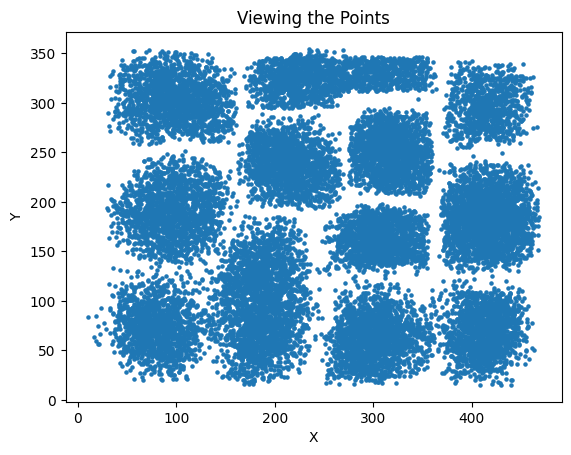

In [5]:
plt.scatter(x[:, 0], x[:, 1], s = 5)
plt.title('Viewing the Points')
plt.xlabel('X')
plt.ylabel('Y')

Find the number of Clusters in the dataset

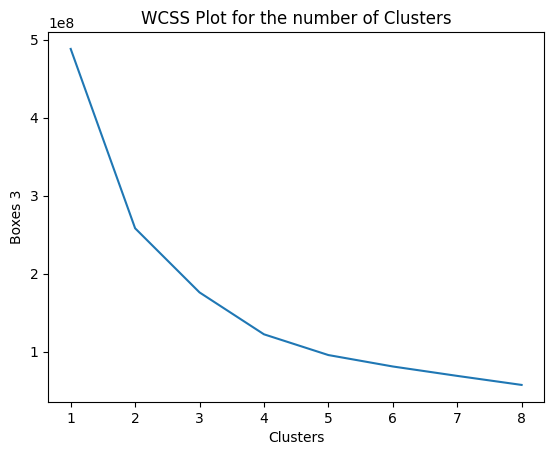

In [8]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 9):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 9), wcss)
plt.title('WCSS Plot for the number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Boxes 3')
plt.show()

Train the K-Means Clustering Model

In [11]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 12)
y_groups = k_means.fit_predict(x)
print(y_groups)

[3 0 0 ... 1 1 4]


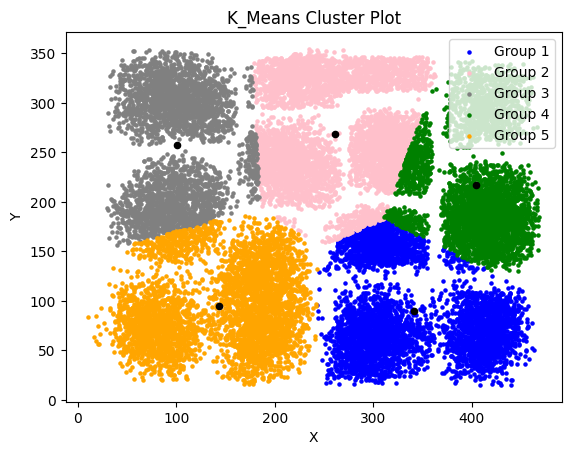

In [15]:
plt.scatter(x[y_groups == 0, 0], x[y_groups == 0, 1], s = 5, color = 'blue', label = 'Group 1')
plt.scatter(x[y_groups == 1, 0], x[y_groups == 1, 1], s = 5, color = 'pink', label = 'Group 2')
plt.scatter(x[y_groups == 2, 0], x[y_groups == 2, 1], s = 5, color = 'grey', label = 'Group 3')
plt.scatter(x[y_groups == 3, 0], x[y_groups == 3, 1], s = 5, color = 'green', label = 'Group 4')
plt.scatter(x[y_groups == 4, 0], x[y_groups == 4, 1], s = 5, color = 'orange', label = 'Group 5')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 50, color = 'black')
plt.title('K_Means Cluster Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Hierarchical Clustering

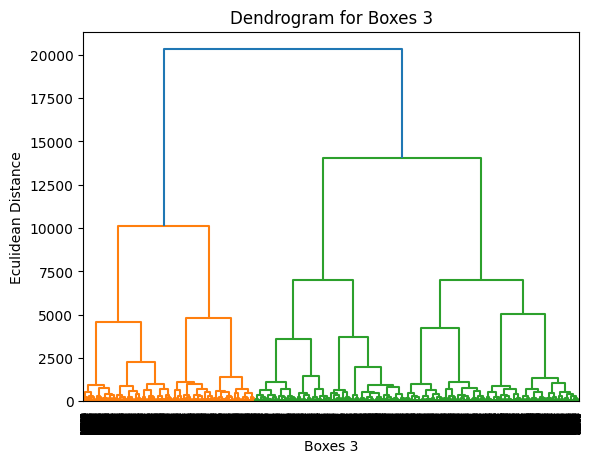

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram for Boxes 3')
plt.xlabel('Boxes 3')
plt.ylabel('Eculidean Distance')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering

hr = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hr = hr.fit_predict(x)
print(y_hr)

[2 2 4 ... 0 0 3]


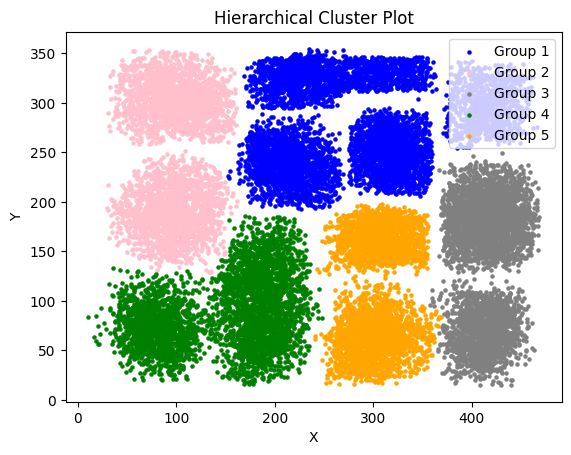

In [29]:
plt.scatter(x[y_hr == 0, 0], x[y_hr == 0, 1], s = 5, color = 'blue', label = 'Group 1')
plt.scatter(x[y_hr == 1, 0], x[y_hr == 1, 1], s = 5, color = 'pink', label = 'Group 2')
plt.scatter(x[y_hr == 2, 0], x[y_hr == 2, 1], s = 5, color = 'grey', label = 'Group 3')
plt.scatter(x[y_hr == 3, 0], x[y_hr == 3, 1], s = 5, color = 'green', label = 'Group 4')
plt.scatter(x[y_hr == 4, 0], x[y_hr == 4, 1], s = 5, color = 'orange', label = 'Group 5')
plt.title('Hierarchical Cluster Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()